In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [301]:
#Loading Data
loan = pd.read_csv("loan.csv" ,low_memory=False)

In [288]:
#Checking Count of Rows and Columns
loan.shape

(39717, 111)

In [289]:
##removing white_spaces from the column names
loan = loan.rename(columns= lambda x: x.strip(), inplace=False)

In [290]:
#Columan wise statistics
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [291]:
#Remove all null value column.
loan.dropna(how='all', axis=1, inplace=True)
loan.shape

(39717, 57)

In [292]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [293]:
#Determine the percentage of missing values in columns
percent_missing = loan.isnull().sum() * 100 / len(loan)
round(percent_missing.sort_values(ascending=False),0).head(20)

next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
last_pymnt_d                   0.0
chargeoff_within_12_mths       0.0
collections_12_mths_ex_med     0.0
revol_util                     0.0
tax_liens                      0.0
title                          0.0
last_credit_pull_d             0.0
home_ownership                 0.0
int_rate                       0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
dtype: float64

In [294]:
#removed >60% missing value columns
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan.shape

(39717, 54)

In [295]:
#remove the columns which are having identical values
drop_cols = [col for col in list(loan) if loan[col].nunique() <= 1]
loan = loan.drop(columns=drop_cols)

In [296]:
loan.shape

(39717, 45)

In [297]:
#Dropping other columns which will not have any role in analysis
col_del_list = ['member_id','url','zip_code','desc','delinq_2yrs','inq_last_6mths','open_acc','revol_bal',\
                'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',\
                'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan.drop(col_del_list, axis = 1,inplace = True)
loan.shape

(39717, 23)

In [250]:
#Checking % of NaNs in columns (>0)
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),2)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]

emp_title               6.19
emp_length              2.71
title                   0.03
pub_rec_bankruptcies    1.75
dtype: float64

In [251]:
#Drop null value rows in Title column since the percentage of NaNns in this column is very less (0.03)
loan = loan[~(loan.title.isnull())]
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),2)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]

emp_title               6.19
emp_length              2.70
pub_rec_bankruptcies    1.76
dtype: float64

In [252]:
#Get the Percentage of unique values in 'pub_rec_bankruptcies' column
loan.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(2)

0.0    94.01
1.0     4.22
NaN     1.76
2.0     0.02
Name: pub_rec_bankruptcies, dtype: float64

In [253]:
#Since 94% 0 values in 'pub_rec_bankruptcies' column so converting NaN with '0' and converting the dtype to 'int'
loan.pub_rec_bankruptcies.fillna('0',inplace=True)
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype('int')

In [254]:
#Recheck 'pub_rec_bankruptcies' column unique values and dtype
print(loan.pub_rec_bankruptcies.unique())
print(loan.pub_rec_bankruptcies.dtype)

[0 1 2]
int32


In [255]:
#again checking percentage of NaNs in columns (>0)
valuesMissingPercentageInColumn = round(100*loan.isnull().sum()/len(loan.index),2)
valuesMissingPercentageInColumn[valuesMissingPercentageInColumn!=0]

emp_title     6.19
emp_length    2.70
dtype: float64

In [256]:
#Replacing null values in 'emp_title' column with 'Unknown'
loan.emp_title.fillna('Unknown',inplace=True)

In [257]:
#Removing word ' years' and deriving numbers from 0 - 10 and n/a with 'Not Set'
loan.emp_length.fillna("Not Set",inplace = True)
loan['emp_length'] = loan['emp_length'].replace({"< 1 year":'0','10+ years':'10'})
loan['emp_length'] = loan['emp_length'].str.strip().str.strip(' years')
loan.emp_length.unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 'Not Set'],
      dtype=object)

In [258]:
#Convert the datatype of amount columns to float type
amountCols = ['loan_amnt','funded_amnt']
loan[amountCols] = loan[amountCols].astype(float)

In [259]:
loan.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
pub_rec                   int64
pub_rec_bankruptcies      int32
dtype: object

In [260]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,Unknown,...,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,0,0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,0,0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,Unknown,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,0,0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,0,0
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,0,0


In [261]:
## converting the date columns (issue_d and earliest_cr_line) to datetime datatype

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [262]:
#adding new columns MonthOfIssue and YearOfIssue & MonthOfCr and YearOfCrLint by extracting the month and year of issue_d resp and earliest_cr_line
loan['MonthOfIssue'] = loan.issue_d.dt.month
loan['YearOfIssue'] = loan.issue_d.dt.year
loan['MonthOfCr'] = loan.earliest_cr_line.dt.month
loan['YearOfCrLint'] = loan.earliest_cr_line.dt.year

In [263]:
#Identify the year derived from teh earliest_cr_line column is intact
loan['YearOfCrLint'].sort_values(ascending=True).unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056,
       2059, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068], dtype=int64)

In [264]:
#As per the above code section it has been observed that years are beyond 2008 and hence reducing the same by 100
loan.loc[loan['YearOfCrLint'] > 2008 , 'YearOfCrLint']  = loan[loan['YearOfCrLint'] > 2008]['YearOfCrLint']-100

In [265]:
loan['YearOfCrLint'].sort_values(ascending=True).unique()

array([1946, 1950, 1954, 1956, 1959, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [266]:
# Removing percentage symbol and converting it in float data type from 'int_rate'
loan['int_rate'] = loan['int_rate'].str.strip().str.strip('%').astype('float')
loan['int_rate'].dtypes

dtype('float64')

In [267]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [268]:
#Removing the word ' months' and conveting in int from 'term' column
loan.term = loan.term.str.strip().str.strip(' months').astype('int')

In [269]:
#finding loan status percentage count for the categories Fully Paid ,Charged off and Current
loan.loan_status.value_counts(normalize=True).mul(100).round(2)

Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64

In [270]:
#remnoveing the rows with status is Current as they are not determined as defaulters Vs non-defaulters
loan = loan[~(loan["loan_status"]=='Current')]

#Assigning '0' to 'fully paid' and 'charged off' to '1' in 'loan_status' solumn
loan["loan_status"] = loan["loan_status"].replace('Fully Paid','0')
loan["loan_status"] = loan["loan_status"].replace('Charged Off','1') #Set Target Variable
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies,MonthOfIssue,YearOfIssue,MonthOfCr,YearOfCrLint
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,Unknown,...,Computer,AZ,27.65,1985-01-01,0,0,12,2011,1,1985
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,...,bike,GA,1.00,1999-04-01,0,0,12,2011,4,1999
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,Unknown,...,real estate business,IL,8.72,2001-11-01,0,0,12,2011,11,2001
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,personel,CA,20.00,1996-02-01,0,0,12,2011,2,1996
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,My wedding loan I promise to pay back,AZ,11.20,2004-11-01,0,0,12,2011,11,2004


In [271]:
#Checking 'fully paid' and 'charged off' converted to '0' and '1'
loan.loan_status.unique()

array(['0', '1'], dtype=object)

In [272]:
#Check count of 'loan_status'
loan.loan_status.value_counts()

0    32941
1     5625
Name: loan_status, dtype: int64

In [273]:
#All integer columns listed under col_continous(continious variables) and rest all col_catagorical(catagorical vaiables)
col_continious = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']
#put the other variables as categorical variables
col_catagorical = pd.DataFrame(loan.columns)
col_catagorical = col_catagorical[~(col_catagorical[0].isin(col_continious))]

In [274]:
col_continious

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies']

In [275]:
col_catagorical

,0
0,id
4,term
7,grade
8,sub_grade
9,emp_title
10,emp_length
11,home_ownership
13,verification_status
14,issue_d
15,loan_status


# Univariate Analysis and Segmented Univariate Analysis

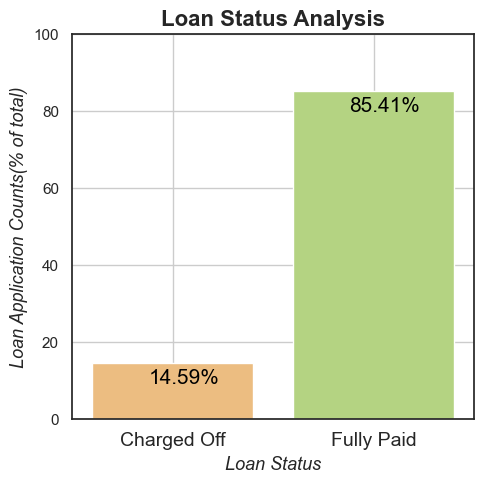

In [277]:
#Lets check how 'loan_status'(%) is distributed
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.loan_status.value_counts(normalize=True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'loan_status':'loan_status_count'})
ax = sns.barplot(x='index',y='loan_status_count', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=['Charged Off','Fully Paid',], rotation='horizontal', fontsize=14)
plt.xlabel('Loan Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Loan Status Analysis', fontsize=16, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()-5.5, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            rotation=0)
    
plt.grid(True)
plt.tight_layout()
plt.show()



### Above analysis shows 14.59 % of the total loan issued have been 'Charged Off' (Defaulted) and 85.41 % are fully paid.

# Loan Issue Year Analysis:

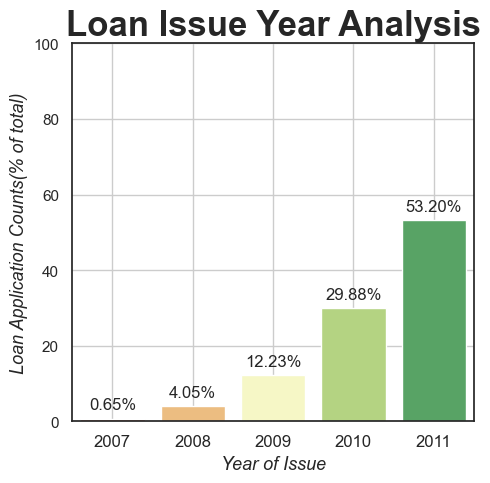

In [224]:
##Lets check the total number of approved applications by year

sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.YearOfIssue.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'YearOfIssue':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='RdYlGn')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=25, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.grid(True)
plt.tight_layout()
plt.show()

### Above analysis shows most of the loans have been given in 2011. This is almost 10 times the loan given year 2008

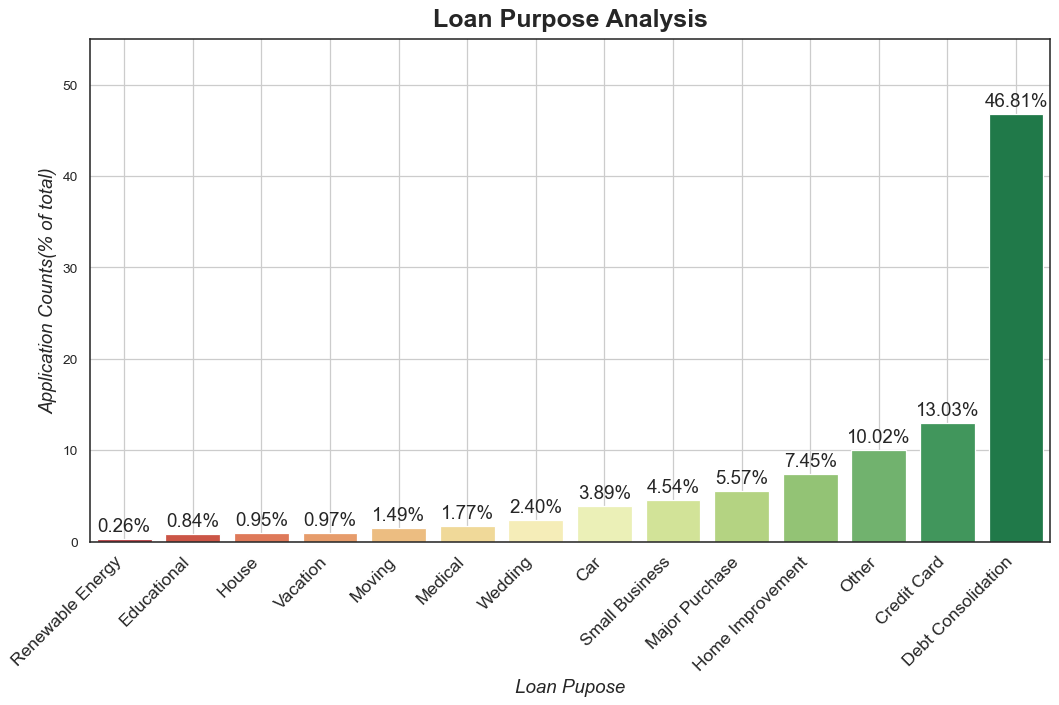

In [226]:
##Loan Purpose analysis
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi = 90)
br = pd.DataFrame(loan.purpose.value_counts(normalize = True).mul(100).sort_values())

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'Loan_Purpose'} )

ax = sns.barplot(x='Loan_Purpose',y='purpose', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.Loan_Purpose), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Loan Pupose', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Loan Purpose Analysis', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,55)
   
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 15, textcoords = 'offset points' )

plt.xticks(range(0,14),['Renewable Energy','Educational','House','Vacation','Moving','Medical','Wedding','Car',\
                       'Small Business','Major Purchase','Home Improvement','Other','Credit Card','Debt Consolidation'])    
plt.grid(True)
plt.tight_layout()
plt.show()

# In the above Debt Consolidation stands at 46.81% for availing loan

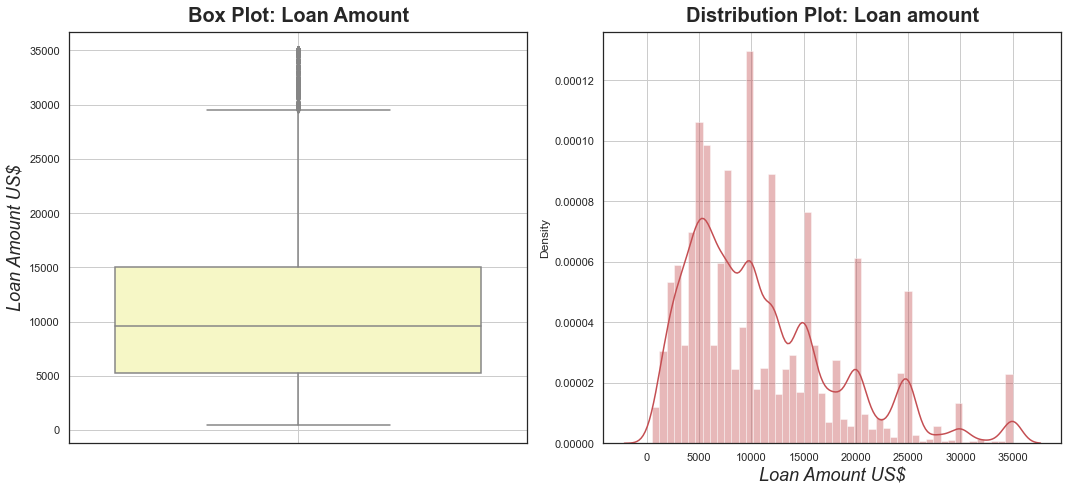

In [227]:
#'Applicant's Loan amount' analysis.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = loan.loan_amnt , palette='RdYlGn')
plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
plt.ylabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan.loan_amnt , hist= True,color="r" )
plt.title('Distribution Plot: Loan amount', fontsize= 20, fontweight='bold', pad=10)
plt.xlabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

### Above analysis shows 50% of loan applicants request a loan amount between 5.3KUSD and 15K USD.

In [228]:
#Analyzing the applicant's annual income variable
round(loan.annual_inc.describe(percentiles=[0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99]))

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
0%          4000.0
25%        40000.0
50%        58876.0
75%        82000.0
90%       115000.0
95%       140004.0
98%       187000.0
99%       234210.0
max      6000000.0
Name: annual_inc, dtype: float64

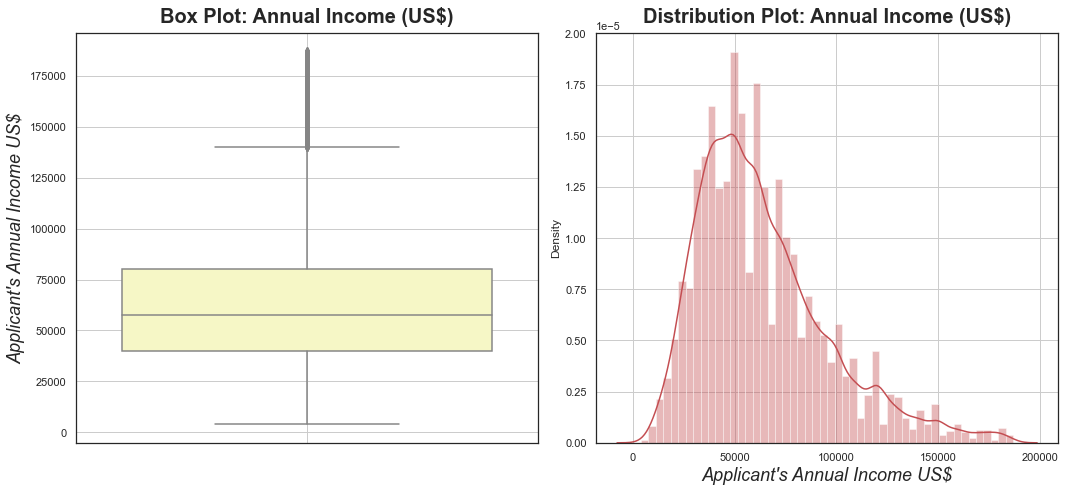

In [229]:
#Eliminating the outliers for analysis, and only considering the data below 98th percentile.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.boxplot(y = loan[loan.annual_inc <= 187000 ]['annual_inc'],palette='RdYlGn')
plt.title("Box Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.ylabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan[loan.annual_inc <= 187000 ]['annual_inc'] , hist= True ,color="r")
plt.title("Distribution Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

### Above analysis shows 50% of the applicants earn between 40K USD and 82K USD annually.

In [230]:
round(loan.annual_inc.describe())

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
25%        40000.0
50%        58876.0
75%        82000.0
max      6000000.0
Name: annual_inc, dtype: float64

# Bivariate Analysis

<Figure size 6000x6000 with 0 Axes>

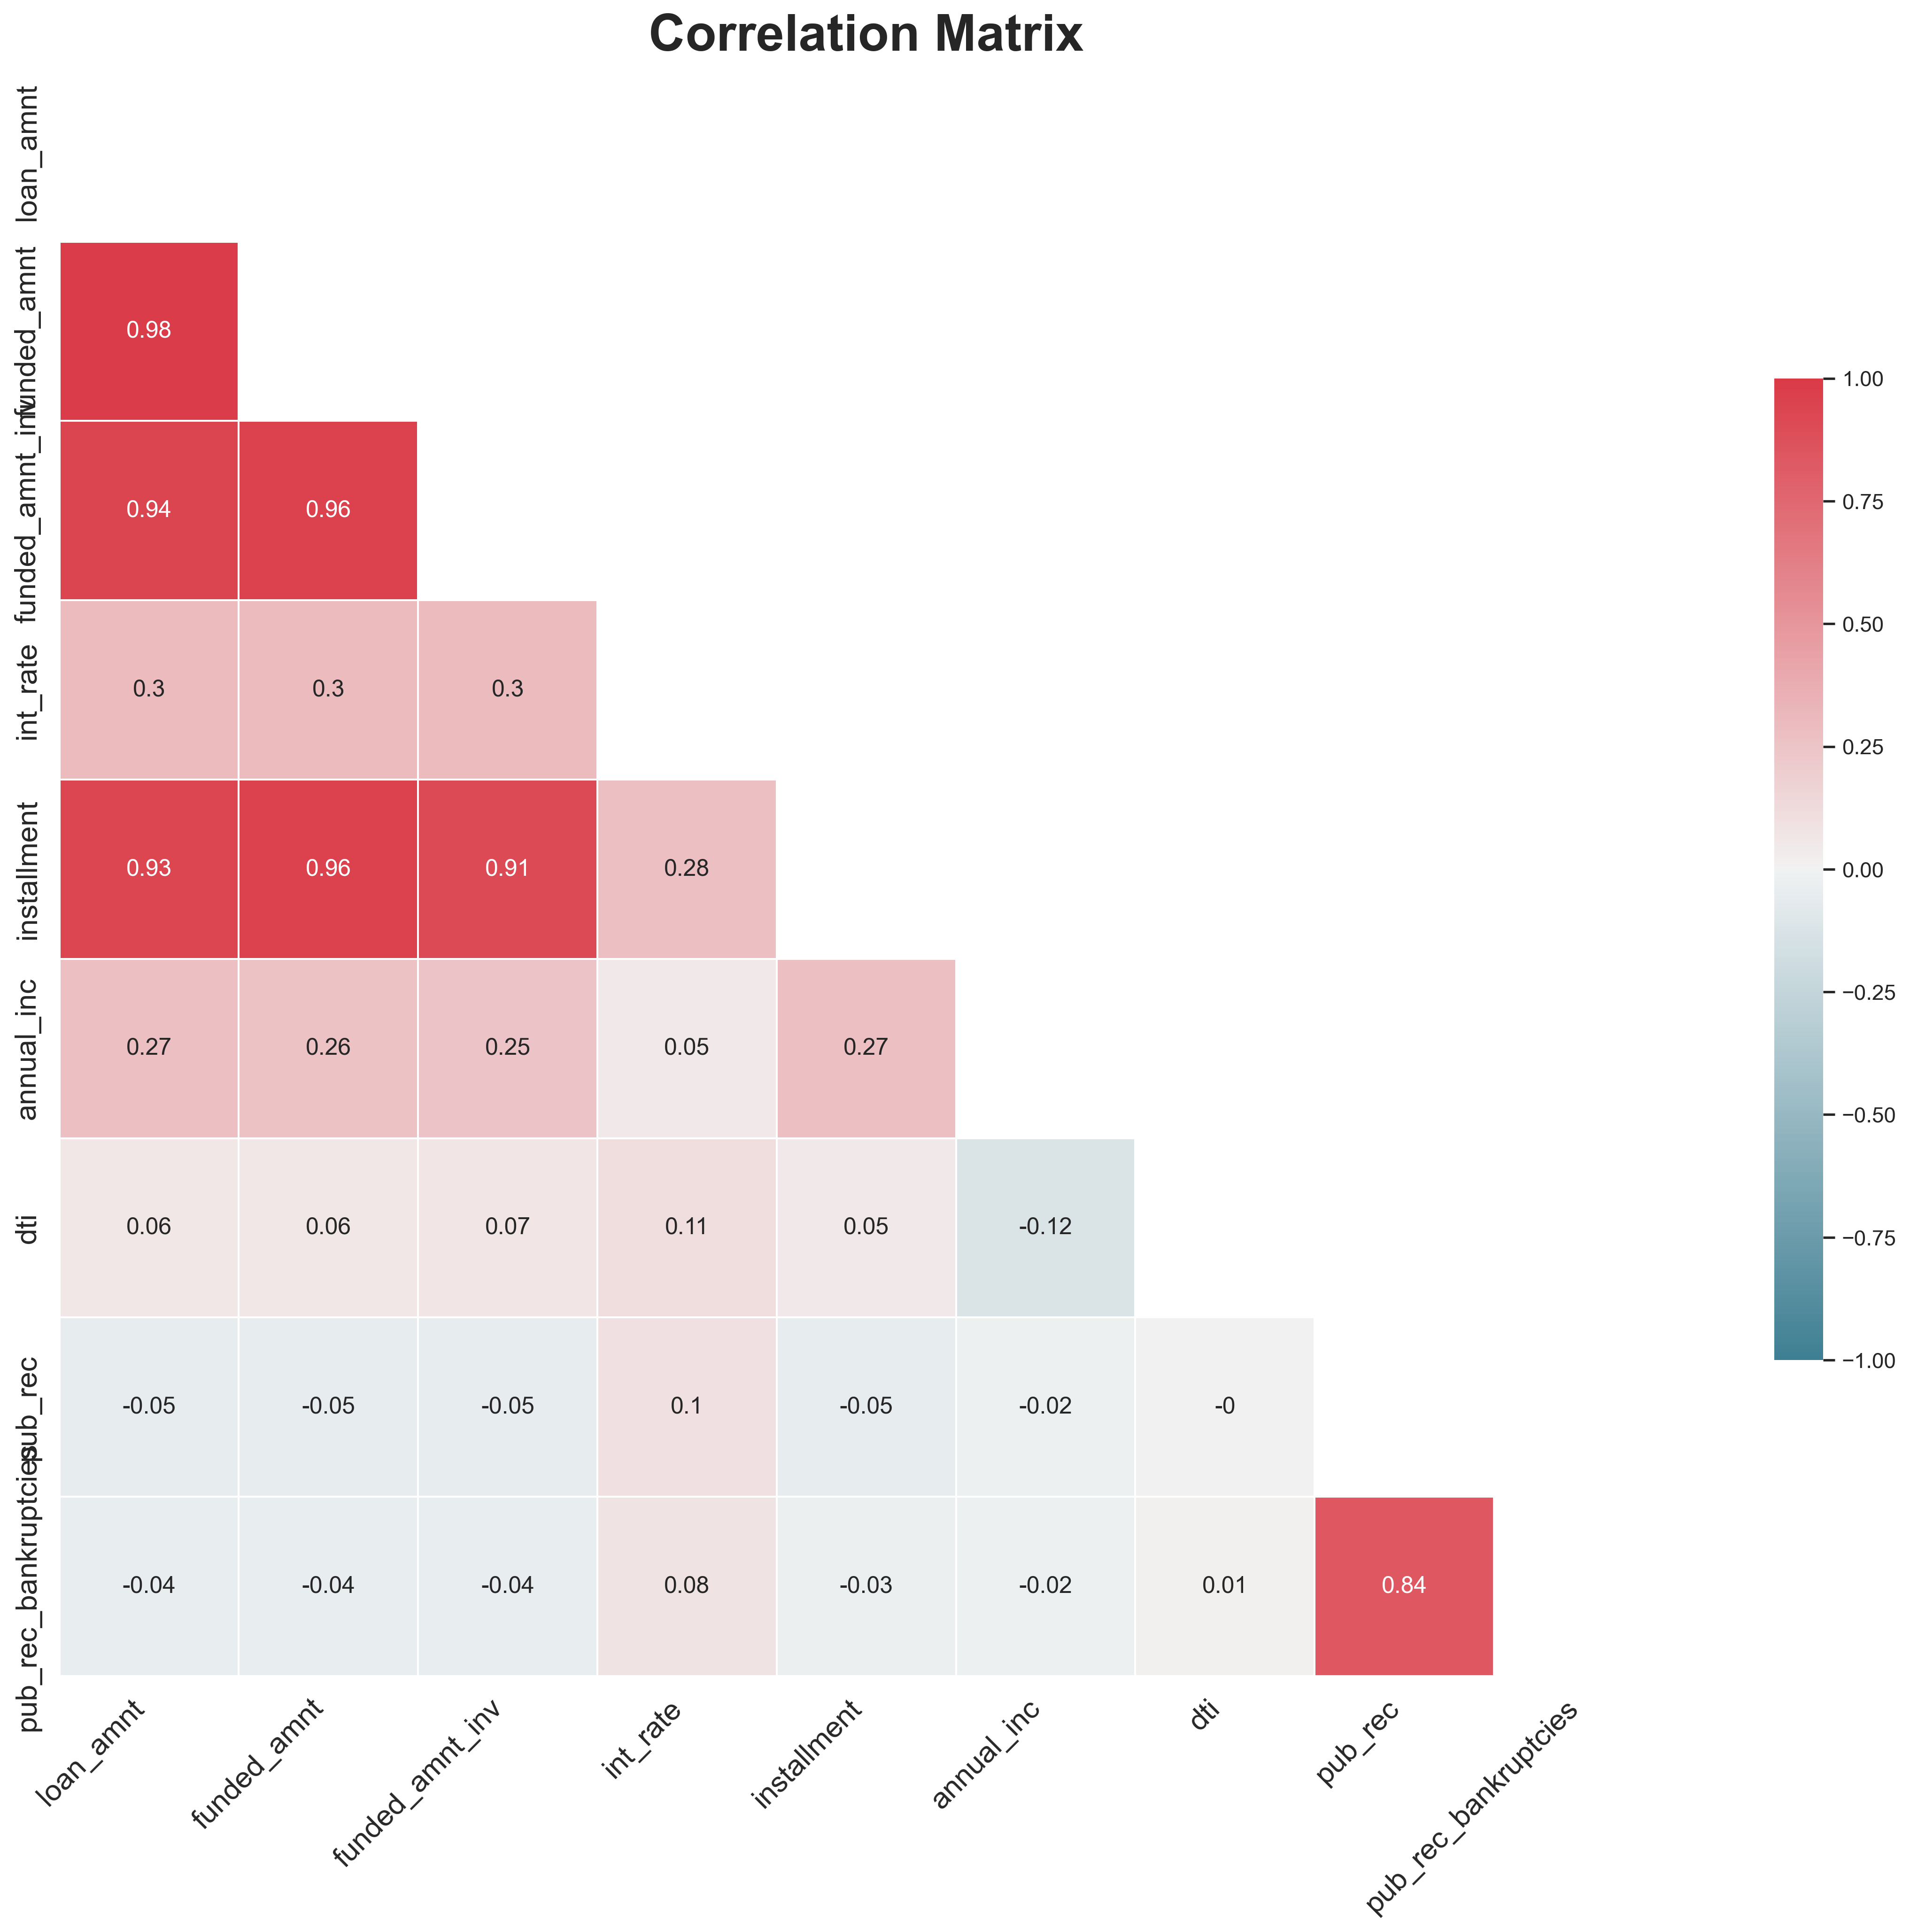

In [231]:
#Corelation
#Bivariate Analyis - Understanding the correlation of continuous variables
sns.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan.copy()
#Recall 'col_list_cont: list of columns containing continuous variables'
df_corr_plot1 = df_corr_plot1.loc[:,col_continious]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()

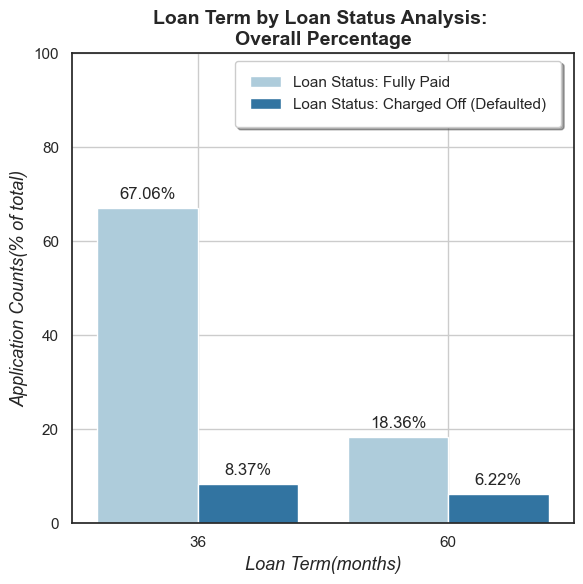

In [232]:
#Analysing applicant's loan term variable 'term' as per 'loan_status'
plt.figure(figsize=(6,6),dpi = 100)
br = pd.DataFrame(100*loan.groupby(['term','loan_status'])['id'].count()/len(loan))
br.reset_index(inplace=True)
br=br.rename(columns={'id':'Percentage'})

ax_123 = sns.barplot(x='term',y='Percentage', hue = 'loan_status',data=br, palette=("Paired"))

plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Term by Loan Status Analysis: \nOverall Percentage', fontsize=14,fontweight='bold')
plt.ylim(0,100)

for p in ax_123.patches:
    ax_123.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#Legend
T1= ax_123.legend(loc='upper center', bbox_to_anchor=(0.65, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T1.get_texts()[0].set_text('Loan Status: Fully Paid')
T1.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.grid(True)
plt.tight_layout()
plt.show()    

### Above analysis shows most of the defaulters belong to the 36 month loan term

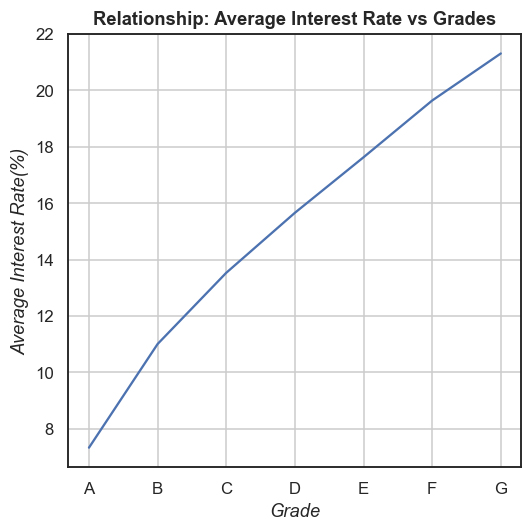

In [233]:
#Average Interest Rate by Grades
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=110)
loan.groupby(['grade']).int_rate.mean().plot.line()
plt.xlabel('Grade', fontsize=12,fontstyle='italic')
plt.ylabel('Average Interest Rate(%)', fontsize=12,fontstyle='italic')
plt.title('Relationship: Average Interest Rate vs Grades', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.grid(True)
plt.show()

### Above analysis shows as the grade move from A to G the agerage interest rates goes on increasing. Hence there is a higher risk of defaulting involved as the grade increases.

In [234]:
##Home Ownership Status and Loan Status analysis. Finding the defaulters(%) according to 'home_ownership' variable. (loan status->charged off i.e. '1')
home = loan.loc[:,['home_ownership','loan_status']]
#Considering only the defaulters (charged off='1')
home = home[home.loan_status=='1']
#Check for unique entries in 'home_ownership' column
home.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

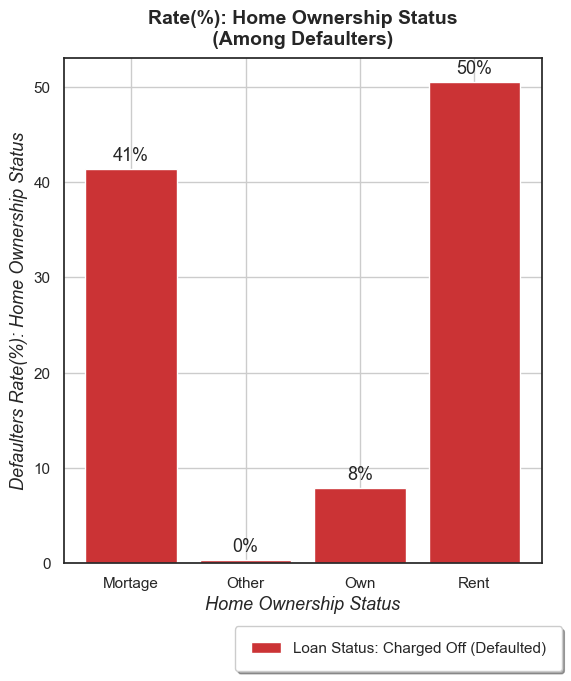

In [282]:
##Retaining the known values only
home_ls_final = home.groupby(['home_ownership','loan_status']).size().to_frame('c_hls')
home_ls_final.reset_index(inplace=True)
home_ls_final['c_hls'] = home_ls_final['c_hls'].astype('int')
home_ls_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7), dpi=100)

home_ls_final['pct_count_of_total']= round(100*home_ls_final['c_hls']/home_ls_final['c_hls'].sum(),2)

ax_K1 = sns.barplot(x=home_ls_final.home_ownership, y=home_ls_final.pct_count_of_total, hue=home_ls_final.loan_status, palette='Set1')
plt.xlabel('Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters Rate(%): Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.title('Rate(%): Home Ownership Status\n (Among Defaulters) ',fontsize= 14, fontweight='bold', pad=10)
plt.ylim(0,100)
#Legend
L1= ax_K1.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L1.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K1.patches:
    ax_K1.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2,3],['Mortage','Other','Own','Rent'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()


### Above analysis shows 91 % of the defaulters already have a mortgage taken out  or live on rent

In [236]:
#Check unique items in 'verification_status' column
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

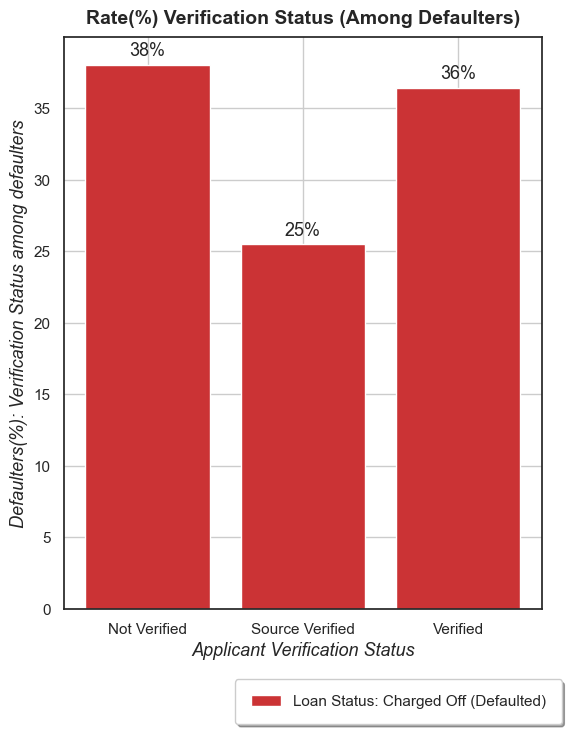

In [237]:
##Finding the defaulters(%) according to 'verification_status' variable. (loan status->charged off i.e. '1')
verf_1 = loan.loc[:,['verification_status','loan_status']]
#Considering only the defaulters (charged off='1')
verf_1 = verf_1[verf_1.loan_status=='1']
#Retaining only the values known
verf_1_final = verf_1.groupby(['verification_status','loan_status']).size().to_frame('c_vls')
verf_1_final.reset_index(inplace=True)
verf_1_final['c_vls'] = verf_1_final['c_vls'].astype('int')
verf_1_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7.5), dpi=100)

verf_1_final['pct_count_of_total']= round(100*verf_1_final['c_vls']/verf_1_final['c_vls'].sum(),2)

ax_K2 = sns.barplot(x=verf_1_final.verification_status, y=verf_1_final.pct_count_of_total, hue=verf_1_final.loan_status, palette='Set1')
plt.xlabel('Applicant Verification Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters(%): Verification Status among defaulters', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Rate(%) Verification Status (Among Defaulters)',fontsize= 14, fontweight='bold', pad=10)
#Legend
L2= ax_K2.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L2.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K2.patches:
    ax_K2.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2],['Not Verified','Source Verified','Verified'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()